In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from geopy.distance import geodesic
import time
from IPython.display import clear_output

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Random Forest Regressor

In [4]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
import matplotlib.pyplot as plt

# RMLSE Function
def rmlse(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)  # Ensure non-negative predictions
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Load Data
df = pd.read_csv('train.csv')

# Remove NaN Values
df = df.dropna()

# Convert timestamps to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Feature Engineering
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month
df['weekday_num'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Define Haversine Function
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth radius in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate Distance
df['distance'] = haversine(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

# Remove Outliers
df = df[(df['distance'] > 0.1) & (df['distance'] < 50)]
df = df[(df['trip_duration'] > 30) & (df['trip_duration'] < 7200)]  # Trip duration in seconds

# Log Transform Target Variable
y = np.log1p(df['trip_duration'].values)

# Feature Selection
x = df[['vendor_id', 'passenger_count', 'distance', 'month', 'weekday_num', 'pickup_hour']].values

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7294)

# Model Training: Random Forest
rf_regression = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regression.fit(x_train, y_train)

# Predictions
y_pred = rf_regression.predict(x_test)

# Inverse Log Transform for Evaluation
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)




In [5]:
# R2 Score
r2 = r2_score(y_test_exp, y_pred_exp)
print(f"R2 Score: {r2}")

# RMLSE
rmlse_score = rmlse(y_test_exp, y_pred_exp)
print(f"RMLSE Score: {rmlse_score}")

R2 Score: 0.6961167542659784
RMLSE Score: 0.4180709597610155


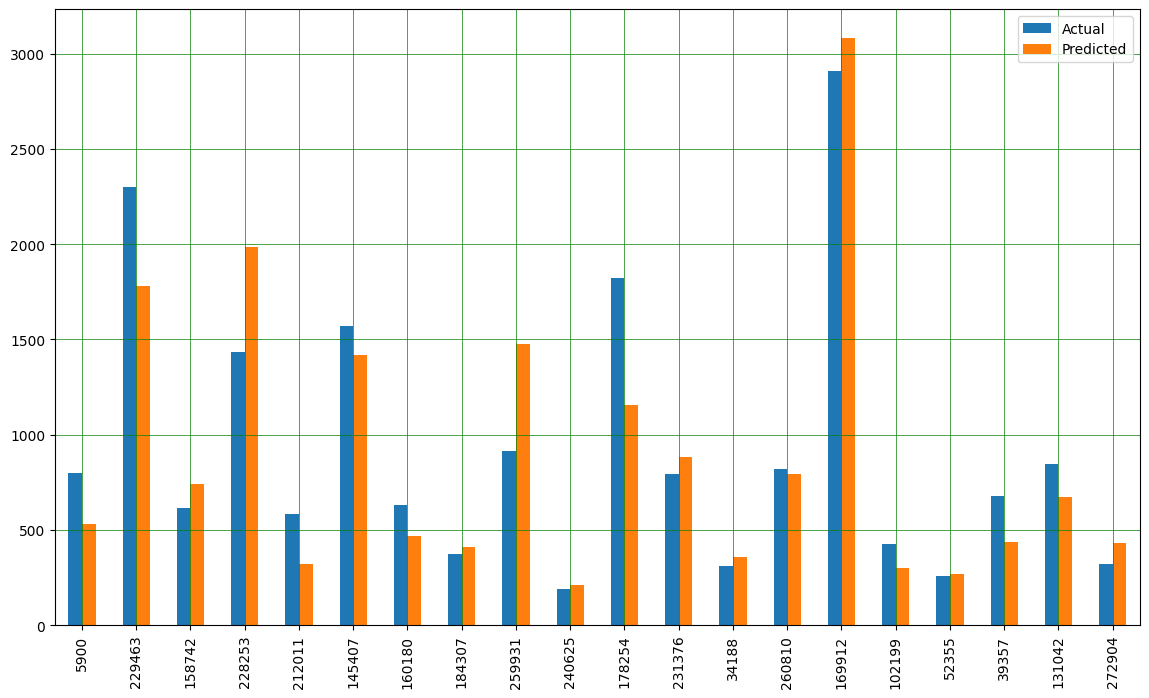

In [6]:


# Visualization of Predictions
predictions = pd.DataFrame({'Actual': y_test_exp.flatten(), 'Predicted': y_pred_exp.flatten()})
predictions.sample(20).plot(kind='bar', figsize=(14, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Regressor

In [7]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# RMLSE Function
def rmlse(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)  # Ensure non-negative predictions
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Load Data
df = pd.read_csv('train.csv')

# Remove NaN Values
df = df.dropna()

# Convert timestamps to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Feature Engineering
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month
df['weekday_num'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Define Haversine Function
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth radius in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate Distance
df['distance'] = haversine(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

# Remove Outliers
df = df[(df['distance'] > 0.1) & (df['distance'] < 50)]
df = df[(df['trip_duration'] > 30) & (df['trip_duration'] < 7200)]  # Trip duration in seconds

# Log Transform Target Variable
y = np.log1p(df['trip_duration'].values)

# Feature Selection
x = df[['vendor_id', 'passenger_count', 'distance', 'month', 'weekday_num', 'pickup_hour']].values

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7294)

# Model Training: XGBoost
xgb_regression = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_regression.fit(x_train, y_train)

# Predictions
y_pred = xgb_regression.predict(x_test)

# Inverse Log Transform for Evaluation
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)





In [8]:
# R2 Score
r2 = r2_score(y_test_exp, y_pred_exp)
print(f"R2 Score: {r2}")

# RMLSE
rmlse_score = rmlse(y_test_exp, y_pred_exp)
print(f"RMLSE Score: {rmlse_score}")

R2 Score: 0.7269143384634965
RMLSE Score: 0.39072995688149603


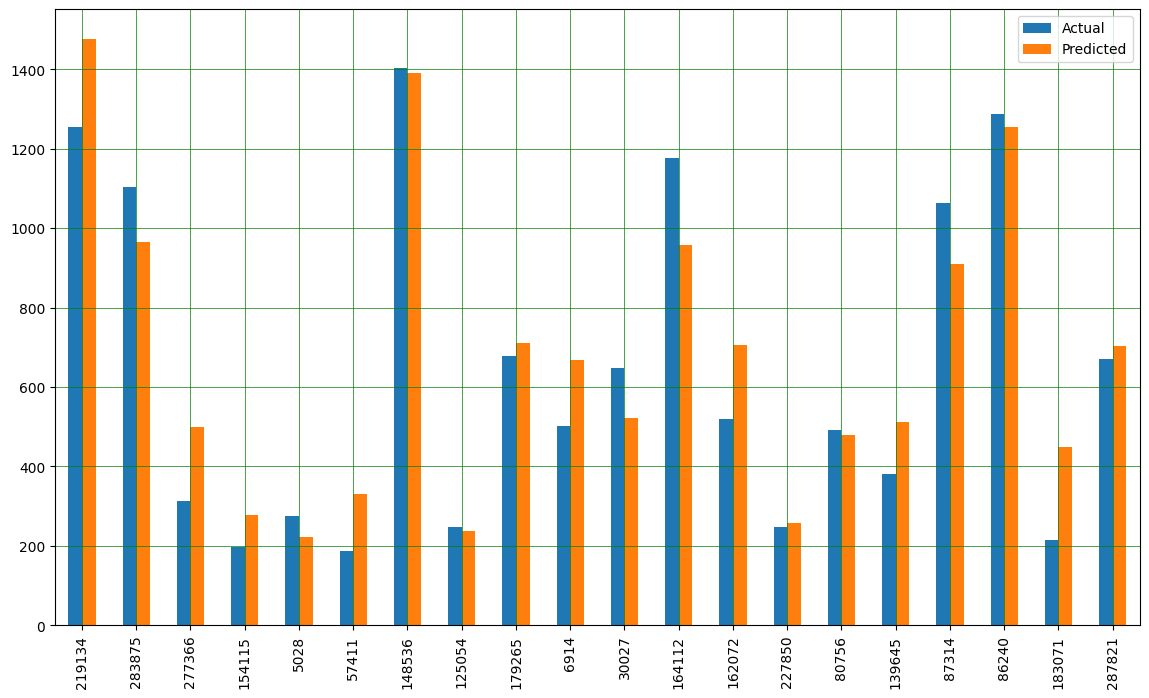

In [9]:


# Visualization of Predictions
predictions = pd.DataFrame({'Actual': y_test_exp.flatten(), 'Predicted': y_pred_exp.flatten()})
predictions.sample(20).plot(kind='bar', figsize=(14, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [11]:
import pickle

# Save the trained model to a file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(xgb_regression, file)
print("Model exported successfully!")

Model exported successfully!
